In [1]:
import numpy as np
import scipy.optimize as optimize
import matplotlib as mpl
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable

import finesse
from finesse.analysis.actions import RunLocks, Noxaxis, Xaxis
from finesse import ligo
from finesse.knm.maps import Map
from finesse.utilities.maps import circular_aperture, surface_point_absorber as spa

finesse.configure(plotting=True)

import warnings
warnings.filterwarnings('ignore')

In [2]:
kat = finesse.Model()
baseLength = 0.045
sideLength = 0.4
alpha = np.degrees(np.arccos(baseLength/2/sideLength))/2
print(alpha)
angleEnd = 90 - 2*alpha
print(angleEnd)
T='10u'
Tbase='500u'

# kat.modes(maxtem=5)
# print(kat.modes())
kat.parse_legacy(f"""

laser i1 1 0 n1

s s1 1 n1 n2 # a space of 1m length

bs1 MCin {Tbase} 30u 0 {alpha} n2 nrefl n3 n4 # input mirror
s sc1 {baseLength} n3 n5 # distance between bs1 and bs2  

bs1 MCout {Tbase} 30u 0 {alpha} ntrans ntest n5 n6 # output mirror
s sc2 {sideLength} n4 n7 # distance between b1 and bs3
s sc3 {sideLength} n6 n8 # distance between b2 and bs3

bs1 MCend {T} 0 0 {angleEnd} n7 n8 dump dump # end mirror
attr MCend Rc 1 # Rc=1m for MCend

cav cav1 MCin n3 MCin n4 # computing cavity parameters

maxtem 5

tem i1 0 0 1 0.0
tem i1 0 4 1.0 0.0
tem i1 1 1 1 0.0
tem i1 1 0 1.0 0.0
""")
# kat.i1.tem(0,0,0,phase=0.0)
# kat.i1.tem(1,1,1,phase=0.0)
# kat.i1.tem(0,4,1,phase=0.0)
# kat.i1.tem(1,0,1,phase=0.0)

test = kat.deepcopy()
test.parse("""

xaxis(MCend.phi, lin, -5, 60, 1000)

ad HG00circ MCend.p4.o 0 n=0 m=0
ad HG11circ MCend.p4.o 0 n=1 m=1
ad HG04circ MCend.p4.o 0 n=0 m=4
ad HG10circ MCend.p4.o 0 n=1 m=0

""")

43.387705204147565
3.22458959170487


In [3]:
print(kat.unparse())

laser i1
space s1 portA=i1.p1 portB=MCin.p1 L=1.0
beamsplitter MCin R=0.99947 T=0.0005 L=3e-05 alpha=43.387705204147565
space sc1 portA=MCin.p3 portB=MCout.p3 L=0.045
beamsplitter MCout R=0.99947 T=0.0005 L=3e-05 alpha=43.387705204147565
space sc2 portA=MCin.p4 portB=MCend.p1 L=0.4
space sc3 portA=MCout.p4 portB=MCend.p2 L=0.4
beamsplitter MCend R=0.99999 T=1e-05 L=0.0 alpha=3.22458959170487 Rc=[1.0, 1.0]
cavity cav1 source=MCin.p3.o priority=1
noxaxis()
modes(maxtem=5)



tem(laser=i1, n=0, m=4, factor=1.0)
tem(laser=i1, n=1, m=1, factor=1.0)
tem(laser=i1, n=1, m=0, factor=1.0)


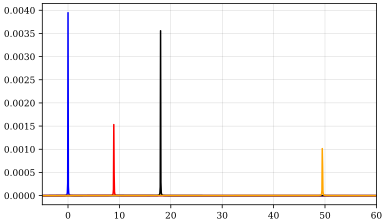

In [103]:
out = test.run()

fig, ax =plt.subplots(figsize=(8,6))

ax.plot(out.x[0], np.abs(out["HG00circ"])**2);
ax.plot(out.x[0], np.abs(out["HG11circ"])**2);
ax.plot(out.x[0], np.abs(out["HG04circ"])**2);
ax.plot(out.x[0], np.abs(out["HG10circ"])**2);

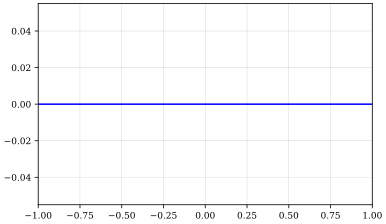

In [39]:
plt.plot(out.x[0], np.abs(out["HG00circ"])**2-np.abs(out["HG11circ"])**2);

In [5]:
(0.00040874+0.0004093)/2

0.00040901999999999996

In [8]:
starting = f"""
laser i1 1 0 n1

maxtem 4

tem i1 0 0 1 0 
tem i1 0 1 1 0
tem i1 1 0 1 0
tem i1 0 2 1 0
tem i1 2 0 1 0
tem i1 1 1 1 0

s s1 1 n1 n2 # a space of 1m length

bs1 MCin 100u 30u 0 42.49967770122078 n2 nrefl n3 n4 # input mirror
s sc1 0.035 n3 n5 # distance between bs1 and bs2  

bs1 MCout 100u 30u 0 42.49967770122078 ntrans ntest n5 n6 # output mirror
s sc2 0.20076416512913856 n4 n7 # distance between b1 and bs3
s sc3 0.20076416512913856 n6 n8 # distance between b2 and bs3

bs1 MCend 100u 0 0 5.000644597558434 n7 n8 dump dump # end mirror
attr MCend Rc 1

#variable RoC 1
#xaxis RoC abs lin 0.5 5000 1000
#put MCend Rc $x1

cav cav1 MCin n3 MCin n4 # computing cavity parameters

"""

kat = finesse.Model()
kat.parse_legacy(starting)

In [18]:
freqx, freqy = kat.cav1.mode_separation/1e6
freqx, freqy

(236.89704071928136, 106.04504686446192)

In [19]:
freqy/0.98

108.2092314943489

In [21]:
0.1*freqy/1.1

9.640458805860174

In [23]:
freqy/1.

106.04504686446192